In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

sns.set_style("whitegrid")

# DRIAMS B

## Random split

In [2]:
folder = "outputs/DRIAMS_B/MLP_random_split_fprint/lowLR_long_BN/metrics"
os.listdir(folder)

['test_metrics_8.json',
 'test_metrics_4.json',
 'test_metrics_1.json',
 'test_metrics_2.json',
 'test_metrics_0.json',
 'test_metrics_6.json',
 'test_metrics_7.json',
 'test_metrics_5.json',
 'test_metrics_9.json',
 'test_metrics_3.json']

In [3]:
metrics = []
for seed in range(10):
    try:
        with open(os.path.join(folder, "test_metrics_{}.json".format(seed)), "r") as f:
            m = json.load(f)
    except:
        continue
    metrics_names = list(m.keys())
    m["seed"] = seed
    metrics.append(m)
metrics_randsplit_df = pd.DataFrame(metrics)        
metrics_randsplit_df


,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,seed
0,0.220980,0.671185,0.803124,0.710420,0.812763,0.816577,0.635805,0
1,0.223357,0.645089,0.790351,0.687000,0.811112,0.793947,0.612412,1
2,0.230678,0.642216,0.792186,0.686991,0.800383,0.781785,0.619046,2
3,0.225250,0.649775,0.787071,0.687145,0.804489,0.815850,0.601843,3
4,0.227953,0.664810,0.803911,0.704907,0.810630,0.801266,0.639289,4
5,0.218269,0.666272,0.808764,0.710165,0.820161,0.789266,0.654102,5
6,0.210895,0.663304,0.794027,0.698233,0.826003,0.826997,0.614054,6
7,0.199751,0.711955,0.828243,0.747783,0.847569,0.836586,0.683404,7
8,0.214587,0.683336,0.817534,0.722448,0.817538,0.804369,0.667000,8
9,0.221108,0.662580,0.791781,0.696006,0.811404,0.832420,0.608823,9


In [4]:
metrics_randsplit_df.drop([]).mean()

test_loss                 0.219283
test_mcc                  0.666052
test_balanced_accuracy    0.801699
test_f1                   0.705110
test_AUPRC                0.816205
test_precision            0.809906
test_recall               0.633578
seed                      4.500000
dtype: float64

In [5]:
metrics_long_table_randsplit = pd.melt(metrics_randsplit_df, id_vars="seed", value_vars=metrics_names)
metrics_long_table_randsplit["experiment"] = "Random Split"
metrics_long_table_randsplit

,seed,variable,value,experiment
0,0,test_loss,0.220980,Random Split
1,1,test_loss,0.223357,Random Split
2,2,test_loss,0.230678,Random Split
3,3,test_loss,0.225250,Random Split
4,4,test_loss,0.227953,Random Split
...,...,...,...,...
65,5,test_recall,0.654102,Random Split
66,6,test_recall,0.614054,Random Split
67,7,test_recall,0.683404,Random Split
68,8,test_recall,0.667000,Random Split


In [6]:
# fig, ax = plt.subplots(figsize=(14,10))
# sns.barplot(data=metrics_long_table, x="variable", y="value", ax=ax)
# plt.show()

## Partitioned 

In [7]:
folder = "outputs/DRIAMS_B/MLP_partition/lowLR_long_BN_part/metrics"
os.listdir(folder)

['test_metrics_8.json',
 'test_metrics_4.json',
 'test_metrics_1.json',
 'test_metrics_2.json',
 'test_metrics_6.json',
 'test_metrics_7.json',
 'test_metrics_5.json',
 'test_metrics_9.json',
 'test_metrics_3.json']

In [8]:
metrics = []
for seed in range(10):
    try:
        with open(os.path.join(folder, "test_metrics_{}.json".format(seed)), "r") as f:
            m = json.load(f)
    except:
        continue
    metrics_names = list(m.keys())
    m["seed"] = seed
    metrics.append(m)
metrics_partition_df = pd.DataFrame(metrics)     
metrics_long_table_part = pd.melt(metrics_partition_df, id_vars="seed", value_vars=metrics_names)
metrics_long_table_part["experiment"] = "Partitioned Split"
metrics_long_table_part
metrics_long_table_part

,seed,variable,value,experiment
0,1,test_loss,0.461755,Partitioned Split
1,2,test_loss,0.400357,Partitioned Split
2,3,test_loss,0.460688,Partitioned Split
3,4,test_loss,0.559934,Partitioned Split
4,5,test_loss,0.455243,Partitioned Split
...,...,...,...,...
58,5,test_recall,0.381475,Partitioned Split
59,6,test_recall,0.400218,Partitioned Split
60,7,test_recall,0.389683,Partitioned Split
61,8,test_recall,0.482743,Partitioned Split


In [9]:
experiments_df = pd.concat([metrics_long_table_randsplit, metrics_long_table_part])
experiments_df

,seed,variable,value,experiment
0,0,test_loss,0.220980,Random Split
1,1,test_loss,0.223357,Random Split
2,2,test_loss,0.230678,Random Split
3,3,test_loss,0.225250,Random Split
4,4,test_loss,0.227953,Random Split
...,...,...,...,...
58,5,test_recall,0.381475,Partitioned Split
59,6,test_recall,0.400218,Partitioned Split
60,7,test_recall,0.389683,Partitioned Split
61,8,test_recall,0.482743,Partitioned Split


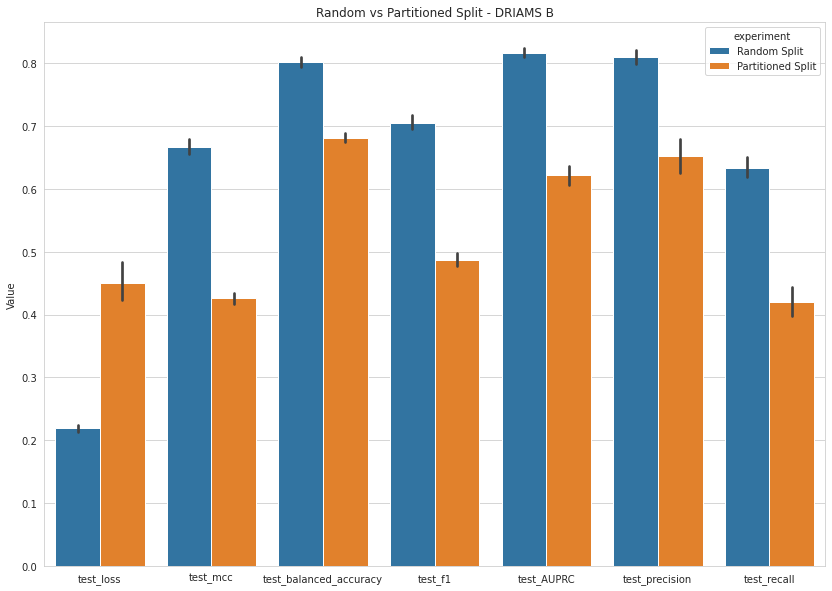

In [10]:
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=experiments_df, x="variable", y="value", hue="experiment", ax=ax)
ax.set_title("Random vs Partitioned Split - DRIAMS B")
ax.set_xlabel("")
ax.set_ylabel("Value")
fig.savefig("outputs/plots/B_rand_vs_partition.png", facecolor="white")
plt.show()

## Zero shot

In [6]:
long_table = pd.read_csv("../processed_data/DRIAMS_combined_long_table.csv")
long_table = long_table[long_table["dataset"]=="B"]

drugs_list = sorted(long_table["drug"].unique())
len(drugs_list)

33

In [7]:
experiment_folder = "outputs/DRIAMS_B/MLP_zero_shot/lowLR_long_BN_zs/metrics"
len(os.listdir(experiment_folder))

34

In [9]:
zs_metrics = []
for i, drug_name in enumerate(drugs_list):
    try:
        with open(os.path.join(experiment_folder, "test_metrics_{}.json".format(i)), "r") as f:
            m = json.load(f)
            # print(m)
            m["drug"] = drug_name
    except:
        continue
    zs_metrics.append(m)
zs_df = pd.DataFrame(zs_metrics)
zs_df.set_index("drug")
zs_df


,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,drug
0,0.129843,0.000000,0.625000,0.000000,NaN,0.000000,0.000000,Amikacin
1,1.087504,0.380345,0.635789,0.422103,0.934243,0.987374,0.274609,Ampicillin
2,2.222682,0.244013,0.571424,0.251169,0.830270,0.975000,0.146751,Benzylpenicillin
3,0.378696,0.547562,0.791757,0.616791,0.693383,0.581214,0.681172,Cefepime
4,0.931728,0.000000,0.500000,0.000000,0.710094,0.000000,0.000000,Cefoxitin
5,0.435036,0.000000,0.500000,0.000000,0.441869,0.000000,0.000000,Ceftazidime
6,0.741520,0.188095,0.654871,0.280954,0.430978,0.179129,0.687607,Ceftriaxone
7,1.315941,0.148236,0.552662,0.555966,0.549738,0.397798,0.935254,Cefuroxime
8,0.396886,0.439283,0.708249,0.513137,0.531461,0.571251,0.489940,Ciprofloxacin
9,0.471307,0.000000,0.500000,0.000000,0.268651,0.000000,0.000000,Clarithromycin


In [10]:
drugs_to_remove = []
for dr in drugs_list:
    df = long_table[long_table["drug"]==dr]
    if len(df["response"].value_counts())<2:
        drugs_to_remove.append(dr)
        
zs_df = zs_df[~zs_df["drug"].isin(drugs_to_remove)].dropna()
zs_df


,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,drug
1,1.087504,0.380345,0.635789,0.422103,0.934243,0.987374,0.274609,Ampicillin
2,2.222682,0.244013,0.571424,0.251169,0.830270,0.975000,0.146751,Benzylpenicillin
3,0.378696,0.547562,0.791757,0.616791,0.693383,0.581214,0.681172,Cefepime
4,0.931728,0.000000,0.500000,0.000000,0.710094,0.000000,0.000000,Cefoxitin
5,0.435036,0.000000,0.500000,0.000000,0.441869,0.000000,0.000000,Ceftazidime
6,0.741520,0.188095,0.654871,0.280954,0.430978,0.179129,0.687607,Ceftriaxone
7,1.315941,0.148236,0.552662,0.555966,0.549738,0.397798,0.935254,Cefuroxime
8,0.396886,0.439283,0.708249,0.513137,0.531461,0.571251,0.489940,Ciprofloxacin
9,0.471307,0.000000,0.500000,0.000000,0.268651,0.000000,0.000000,Clarithromycin
11,0.554825,0.143703,0.596813,0.259675,0.326527,0.190045,0.434972,Cotrimoxazol


In [19]:
similarity = pd.read_csv("../processed_data/maccs_similarity_new.csv", index_col=0)
similarity = similarity[[c for c in similarity.columns if c in drugs_list]]
similarity = similarity.loc[[c for c in similarity.columns]]
similarity_mat = similarity.values - np.eye(len(similarity))
similarity_mat

array([[0.        , 0.39726027, 0.42465753, ..., 0.44594595, 0.53947368,
        0.63513514],
       [0.39726027, 0.        , 0.89090909, ..., 0.52857143, 0.48101266,
        0.47560976],
       [0.42465753, 0.89090909, 0.        , ..., 0.47297297, 0.50632911,
        0.5       ],
       ...,
       [0.44594595, 0.52857143, 0.47297297, ..., 0.        , 0.84848485,
        0.61538462],
       [0.53947368, 0.48101266, 0.50632911, ..., 0.84848485, 0.        ,
        0.7       ],
       [0.63513514, 0.47560976, 0.5       , ..., 0.61538462, 0.7       ,
        0.        ]])

In [27]:
max_similarity = dict(zip(similarity.columns, np.max(similarity_mat, axis=0)))
max_similarity

{'Amikacin': 0.7166666666666667,
 'Ampicillin': 0.8909090909090909,
 'Benzylpenicillin': 0.8909090909090909,
 'Cefepime': 0.8021978021978022,
 'Cefoxitin': 0.8289473684210527,
 'Ceftazidime': 0.8314606741573034,
 'Ceftriaxone': 0.8314606741573034,
 'Cefuroxime': 0.8289473684210527,
 'Ciprofloxacin': 0.9365079365079364,
 'Clarithromycin': 0.981132075471698,
 'Clindamycin': 0.631578947368421,
 'Daptomycin': 0.8051948051948052,
 'Ertapenem': 0.8461538461538461,
 'Erythromycin': 0.981132075471698,
 'Fosfomycin': 0.3035714285714285,
 'Fusidic acid': 0.6296296296296297,
 'Gentamicin': 0.7166666666666667,
 'Imipenem': 0.7391304347826086,
 'Levofloxacin': 0.7857142857142857,
 'Linezolid': 0.68,
 'Meropenem': 0.8461538461538461,
 'Metronidazole': 0.5540540540540541,
 'Minocycline': 0.9649122807017544,
 'Mupirocin': 0.6296296296296297,
 'Nitrofurantoin': 0.5540540540540541,
 'Norfloxacin': 0.9365079365079364,
 'Oxacillin': 0.765625,
 'Rifampicin': 0.6770833333333334,
 'Teicoplanin': 0.8421052631

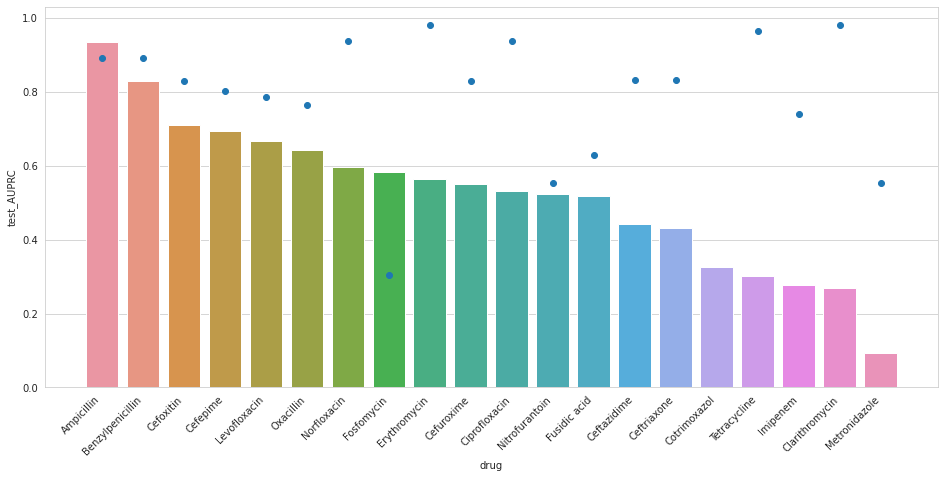

In [31]:
sel_metric = "test_AUPRC"
df = zs_df.dropna().sort_values(by=sel_metric, ascending=False)

fig, ax = plt.subplots(figsize=(16, 7))
sns.barplot(data=df, y=sel_metric, x="drug", ax=ax)
ax.scatter(df["drug"], df["drug"].map(max_similarity))
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)

plt.show()

In [32]:
df["drug"]

1           Ampicillin
2     Benzylpenicillin
4            Cefoxitin
3             Cefepime
19        Levofloxacin
27           Oxacillin
26         Norfloxacin
15          Fosfomycin
14        Erythromycin
7           Cefuroxime
8        Ciprofloxacin
25      Nitrofurantoin
16        Fusidic acid
5          Ceftazidime
6          Ceftriaxone
11        Cotrimoxazol
30        Tetracycline
18            Imipenem
9       Clarithromycin
22       Metronidazole
Name: drug, dtype: object

In [18]:
df

,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,drug
1,1.087504,0.380345,0.635789,0.422103,0.934243,0.987374,0.274609,Ampicillin
2,2.222682,0.244013,0.571424,0.251169,0.830270,0.975000,0.146751,Benzylpenicillin
4,0.931728,0.000000,0.500000,0.000000,0.710094,0.000000,0.000000,Cefoxitin
3,0.378696,0.547562,0.791757,0.616791,0.693383,0.581214,0.681172,Cefepime
19,0.357671,0.188375,0.550011,0.170080,0.666406,0.512500,0.107405,Levofloxacin
27,0.455181,0.477250,0.753985,0.619220,0.643841,0.556333,0.705266,Oxacillin
26,0.384882,0.221631,0.542199,0.146564,0.596548,0.828571,0.085798,Norfloxacin
15,1.755129,0.055360,0.510632,0.320768,0.582209,0.194094,0.997126,Fosfomycin
14,0.491741,0.137510,0.529476,0.102872,0.565139,0.482143,0.060325,Erythromycin
7,1.315941,0.148236,0.552662,0.555966,0.549738,0.397798,0.935254,Cefuroxime


# DRIAMS C

## Random split

In [15]:
folder = "outputs/DRIAMS_C/MLP_randsplit_driamsC/lowLR_long_BN/metrics"
os.listdir(folder)

['test_metrics_8.json',
 'test_metrics_4.json',
 'test_metrics_1.json',
 'test_metrics_2.json',
 'test_metrics_0.json',
 'test_metrics_6.json',
 'test_metrics_7.json',
 'test_metrics_5.json',
 'test_metrics_9.json',
 'test_metrics_3.json']

In [16]:
metrics = []
for seed in range(10):
    try:
        with open(os.path.join(folder, "test_metrics_{}.json".format(seed)), "r") as f:
            m = json.load(f)
    except:
        continue
    metrics_names = list(m.keys())
    m["seed"] = seed
    metrics.append(m)
metrics_randsplit_df = pd.DataFrame(metrics)        
metrics_randsplit_df
metrics_long_table_randsplit = pd.melt(metrics_randsplit_df, id_vars="seed", value_vars=metrics_names)
metrics_long_table_randsplit["experiment"] = "Random Split"
metrics_long_table_randsplit


,seed,variable,value,experiment
0,0,test_loss,0.236333,Random Split
1,1,test_loss,0.254902,Random Split
2,2,test_loss,0.258554,Random Split
3,3,test_loss,0.256063,Random Split
4,4,test_loss,0.244154,Random Split
...,...,...,...,...
65,5,test_recall,0.685178,Random Split
66,6,test_recall,0.709797,Random Split
67,7,test_recall,0.686888,Random Split
68,8,test_recall,0.714475,Random Split


## Partitioned 

In [17]:
folder = "outputs/DRIAMS_C/MLP_partition_driamsC/lowLR_long_BN_part/metrics"
os.listdir(folder)

['test_metrics_8.json',
 'test_metrics_1.json',
 'test_metrics_0.json',
 'test_metrics_7.json']

In [18]:
metrics = []
for seed in range(10):
    try:
        with open(os.path.join(folder, "test_metrics_{}.json".format(seed)), "r") as f:
            m = json.load(f)
    except:
        continue
    metrics_names = list(m.keys())
    m["seed"] = seed
    metrics.append(m)
metrics_partition_df = pd.DataFrame(metrics)     
metrics_long_table_part = pd.melt(metrics_partition_df, id_vars="seed", value_vars=metrics_names)
metrics_long_table_part["experiment"] = "Partitioned Split"
metrics_long_table_part
metrics_long_table_part

,seed,variable,value,experiment
0,0,test_loss,0.593850,Partitioned Split
1,1,test_loss,0.664034,Partitioned Split
2,7,test_loss,0.536148,Partitioned Split
3,8,test_loss,0.620548,Partitioned Split
4,0,test_mcc,0.385725,Partitioned Split
5,1,test_mcc,0.370612,Partitioned Split
6,7,test_mcc,0.354136,Partitioned Split
7,8,test_mcc,0.416294,Partitioned Split
8,0,test_balanced_accuracy,0.692519,Partitioned Split
9,1,test_balanced_accuracy,0.683995,Partitioned Split


In [19]:
experiments_df = pd.concat([metrics_long_table_randsplit, metrics_long_table_part])
experiments_df

,seed,variable,value,experiment
0,0,test_loss,0.236333,Random Split
1,1,test_loss,0.254902,Random Split
2,2,test_loss,0.258554,Random Split
3,3,test_loss,0.256063,Random Split
4,4,test_loss,0.244154,Random Split
...,...,...,...,...
23,8,test_precision,0.610579,Partitioned Split
24,0,test_recall,0.515571,Partitioned Split
25,1,test_recall,0.511232,Partitioned Split
26,7,test_recall,0.485749,Partitioned Split


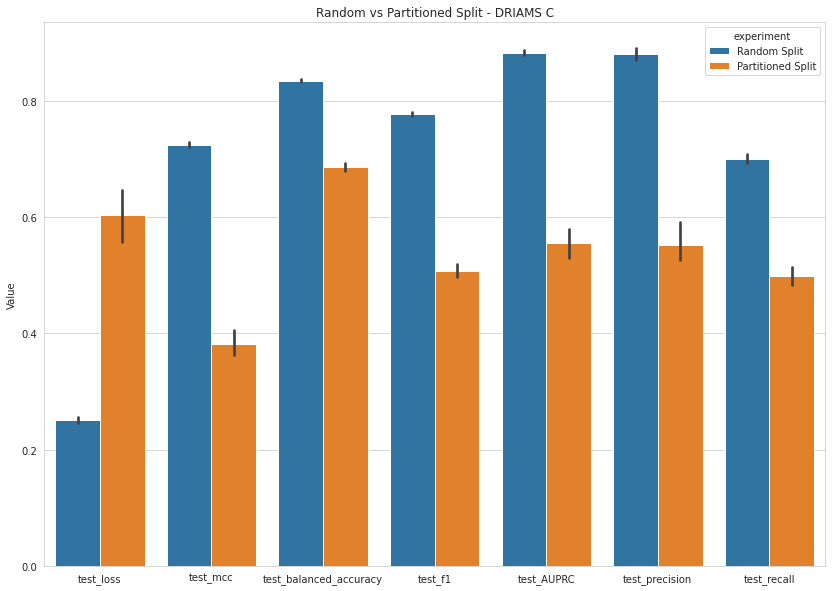

In [20]:
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=experiments_df, x="variable", y="value", hue="experiment", ax=ax)
ax.set_title("Random vs Partitioned Split - DRIAMS C")
ax.set_xlabel("")
ax.set_ylabel("Value")
fig.savefig("outputs/plots/C_rand_vs_partition.png", facecolor="white")
plt.show()

## Zero shot


In [21]:
long_table = pd.read_csv("../processed_data/DRIAMS_combined_long_table.csv")
long_table = long_table[long_table["dataset"]=="C"]


drugs_list = sorted(long_table["drug"].unique())
len(drugs_list)


44

In [22]:
experiment_folder = "outputs/DRIAMS_C/MLP_zero_shot_driamsC/lowLR_long_BN_zs/metrics"
len(os.listdir(experiment_folder))

44

In [23]:
zs_metrics = []
for i, drug_name in enumerate(drugs_list):
    try:
        with open(os.path.join(experiment_folder, "test_metrics_{}.json".format(i)), "r") as f:
            m = json.load(f)
            # print(m)
            m["drug"] = drug_name
    except:
        continue
    zs_metrics.append(m)
zs_df = pd.DataFrame(zs_metrics)
zs_df.set_index("drug")
zs_df


,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,drug
0,0.187817,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,5-Fluorocytosine
1,0.115877,0.000000,0.666667,0.000000,NaN,0.000000,0.000000,Amikacin
2,0.368751,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,Amphotericin B
3,1.303049,0.184204,0.550328,0.183886,0.750696,0.993143,0.103470,Ampicillin
4,0.217141,0.000000,0.500000,0.000000,0.576923,0.000000,0.000000,Azithromycin
5,0.455903,0.000000,0.769231,0.000000,NaN,0.000000,0.000000,Caspofungin
6,0.508203,-0.008684,0.494362,0.155691,0.196919,0.134452,0.207304,Cefepime
7,0.045644,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,Cefotaxime
8,0.489310,0.000000,0.500000,0.000000,0.194823,0.000000,0.000000,Ceftazidime
9,0.761148,0.000000,0.500000,0.000000,0.719669,0.000000,0.000000,Ceftriaxone


In [36]:
drugs_to_remove = []
for dr in drugs_list:
    df = long_table[long_table["drug"]==dr]
    if len(df["response"].value_counts())<2:
        drugs_to_remove.append(dr)
        
zs_df = zs_df[~zs_df["drug"].isin(drugs_to_remove)].dropna()
zs_df


,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,drug
3,1.303049,0.184204,0.550328,0.183886,0.750696,0.993143,0.103470,Ampicillin
4,0.217141,0.000000,0.500000,0.000000,0.576923,0.000000,0.000000,Azithromycin
6,0.508203,-0.008684,0.494362,0.155691,0.196919,0.134452,0.207304,Cefepime
8,0.489310,0.000000,0.500000,0.000000,0.194823,0.000000,0.000000,Ceftazidime
9,0.761148,0.000000,0.500000,0.000000,0.719669,0.000000,0.000000,Ceftriaxone
10,0.707720,0.193997,0.598633,0.551190,0.700209,0.468147,0.680937,Cefuroxime
11,0.291377,0.000000,0.500000,0.000000,0.331459,0.000000,0.000000,Ciprofloxacin
12,0.611182,0.000000,0.500000,0.000000,0.227622,0.000000,0.000000,Clarithromycin
13,0.490342,0.607833,0.804467,0.727278,0.782699,0.725737,0.735566,Clindamycin
14,1.751324,0.000000,0.500000,0.000000,0.289076,0.000000,0.000000,Colistin


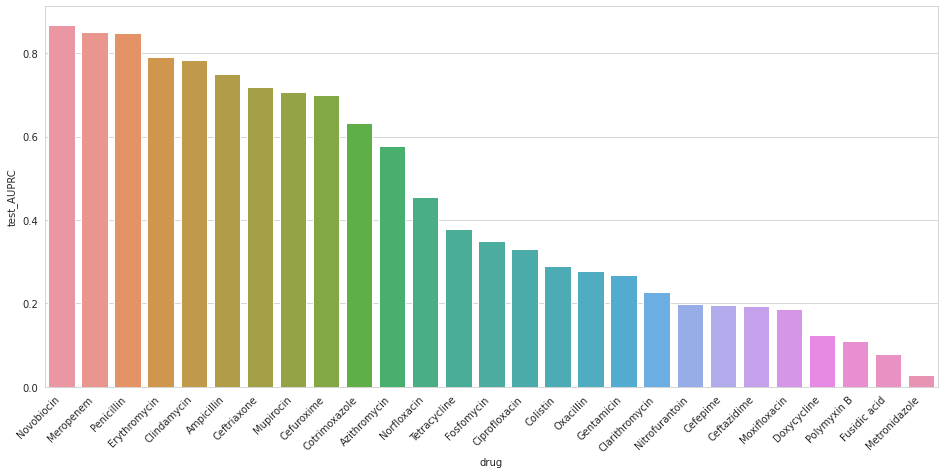

In [37]:
df = zs_df.dropna().sort_values(by="test_AUPRC", ascending=False)

fig, ax = plt.subplots(figsize=(16, 7))
sns.barplot(data=df, y="test_AUPRC", x="drug", ax=ax)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)

plt.show()